<IPython.core.display.Javascript object>


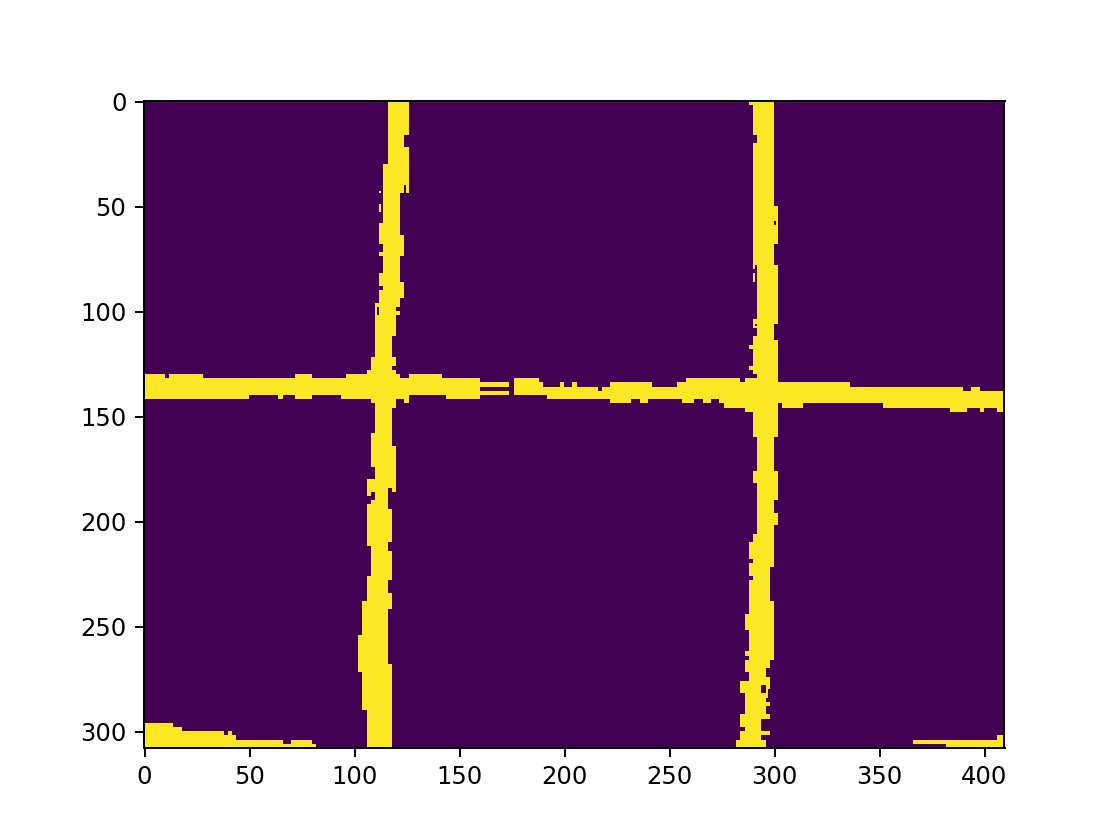

In [8]:
%matplotlib notebook

import cv2
import numpy as np
import matplotlib.pyplot as plt
import py_grid_finder as gr
from math import cos, sin

video = cv2.VideoCapture("../Video/easy.mp4")
for i in range(120):
    result, image = video.read()

assert(result)
# image = cv2.flip(image, 0)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

lower_red1 = np.array([0, 30, 0])
upper_red1 = np.array([10, 255, 255])
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)

lower_red2 = np.array([170, 30, 0])
upper_red2 = np.array([180, 255, 255])
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

mask = mask1 | mask2
plt.imshow(mask)
plt.show()


(204, 137)
0.034906584859402644
8
(296, 156)
-1.5707963267948966
12


<IPython.core.display.Javascript object>


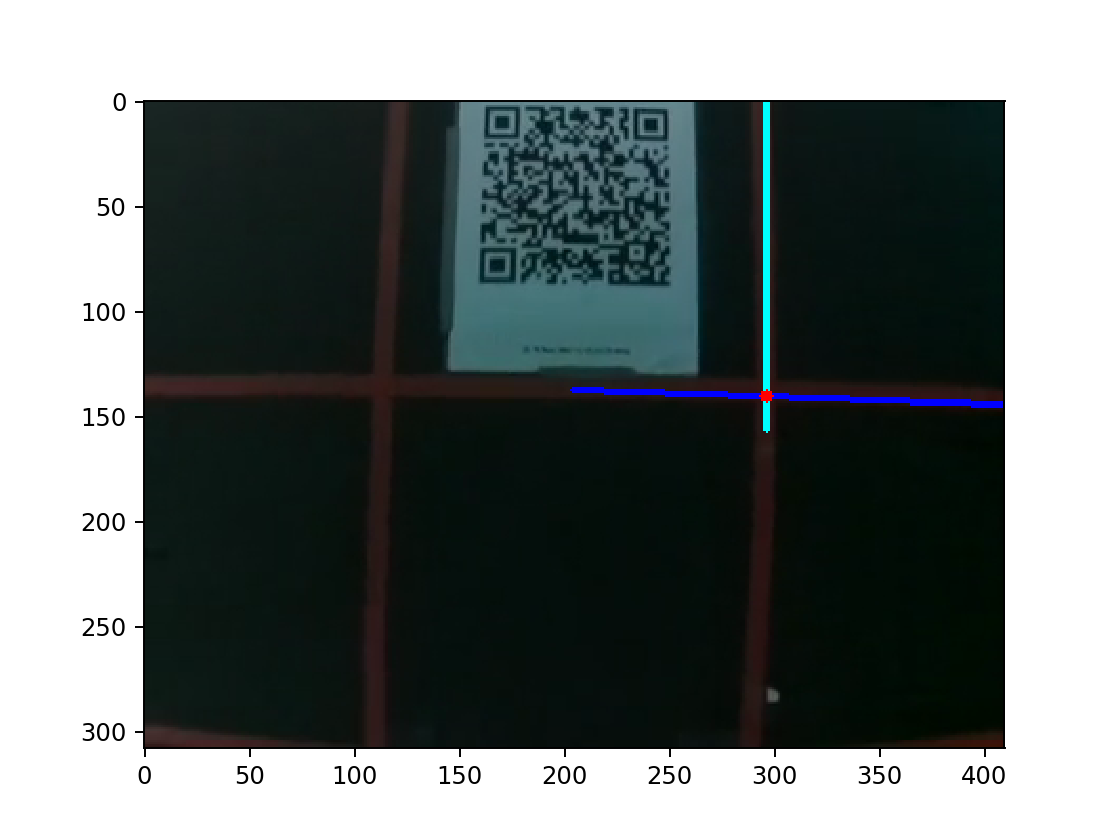

In [10]:
gf = gr.GridFinder(np.array(mask))
fl = gf.getFirstLine()
print(fl.getLineCenter())
print(fl.getAngle())
print(fl.getWidth())

gf = gr.GridFinder(np.array(mask))
nl = gf.findNextLine(fl)
print(nl.getLineCenter())
print(nl.getAngle())
print(nl.getWidth())

p1 = (fl.getLineCenter().x, fl.getLineCenter().y)
p2 = (fl.getLineCenter().x + int(410 * cos(fl.getAngle())), int(fl.getLineCenter().y + 410 * sin(fl.getAngle())))
cv2.line(image,p1,p2, (0, 0, 255), 2)
p1 = (nl.getLineCenter().x, nl.getLineCenter().y)
p2 = (nl.getLineCenter().x + int(410 * cos(nl.getAngle())), int(nl.getLineCenter().y + 410 * sin(nl.getAngle())))
cv2.line(image,p1,p2, (0, 255, 255), 2)

intersect = gr.intersect(fl, nl)
cv2.circle(image, intersect, 3, (255, 0, 0), -1)

plt.figure()
plt.imshow(image)
plt.show()